In [17]:
path='/content/drive/My Drive/IIT BOMBAY/MINI_PROJECT(AUG-SEP)VETRISELVAN_T/images/'
#NOTE : please do change the path according to your device
from skimage.io import imread 
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
target = []
image = []
data = []
for dirpath,dirfiles,filename in os.walk(path):
  for file in filename:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{file}')
    final_img = resize(img,(50,50,3))
    image.append(final_img)
    data.append(final_img.flatten())

In [19]:
import pandas as pd
df = pd.DataFrame(data)
df['Target'] = target
x = df.iloc[:,:7500].values
y = df.iloc[:,7500].values

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()
param_grid = {'C': [10], 'gamma': [0.001], 'kernel': ['rbf']}
#param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
model_grid = GridSearchCV(model, param_grid)
model_grid.fit(x_train,y_train)
y_pred = model_grid.predict(x_test)
print('Best params')
print(model_grid.best_params_)
print('Predicted value')
print(y_pred)
print('Source value')
print(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best params
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Predicted value
['dark grapes fruit' 'dark grapes fruit' 'dark grapes fruit'
 'dark grapes fruit' 'cherry fruit' 'dark grapes fruit'
 'dark grapes fruit' 'cherry fruit' 'cherry fruit' 'cherry fruit'
 'cherry fruit' 'dark grapes fruit' 'dark grapes fruit' 'cherry fruit'
 'cherry fruit' 'dark grapes fruit' 'cherry fruit' 'dark grapes fruit'
 'cherry fruit' 'dark grapes fruit' 'cherry fruit' 'cherry fruit'
 'dark grapes fruit' 'dark grapes fruit' 'dark grapes fruit'
 'dark grapes fruit']
Source value
['dark grapes fruit' 'dark grapes fruit' 'dark grapes fruit'
 'dark grapes fruit' 'cherry fruit' 'dark grapes fruit'
 'dark grapes fruit' 'cherry fruit' 'cherry fruit' 'cherry fruit'
 'cherry fruit' 'dark grapes fruit' 'dark grapes fruit' 'cherry fruit'
 'cherry fruit' 'dark grapes fruit' 'cherry fruit' 'dark grapes fruit'
 'cherry fruit' 'dark grapes fruit' 'cherry fruit' 'cherry fruit'
 'dark grapes fruit' 'dark grapes fruit' 'dark grap

In [26]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification Report')
print(classification_report(y_pred,y_test))

classification Report
                   precision    recall  f1-score   support

     cherry fruit       1.00      1.00      1.00        11
dark grapes fruit       1.00      1.00      1.00        15

         accuracy                           1.00        26
        macro avg       1.00      1.00      1.00        26
     weighted avg       1.00      1.00      1.00        26



In [27]:
print('Accuracy Score')
print(accuracy_score(y_pred,y_test))

Accuracy Score
1.0


In [24]:
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))

Confusion matrix
[[11  0]
 [ 0 15]]


Prediction
['final check']
Image


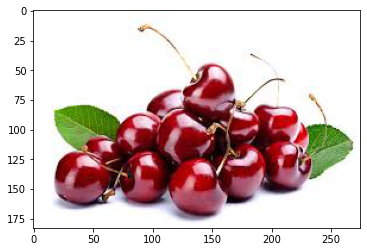

In [25]:
#let's try to predict for a new image
path = '/content/drive/My Drive/IIT BOMBAY/MINI_PROJECT(AUG-SEP)VETRISELVAN_T/images/final check/final_one.jpg'
#NOTE : please do change the path according to your device
final = imread(path)
final_size = resize(final,(50,50,3))
final_flat = final_size.flatten()
final_norm = norm.transform([final_flat])
prediction = model_grid.predict(final_norm)
print('Prediction')
print(prediction)
print('Image')
plt.imshow(final)